<a href="https://colab.research.google.com/github/juanesoc/Instagram-API-python/blob/master/WHO_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import seaborn as sns

In [2]:
colnames = ["Date_reported","Country_code","Country","WHO_region","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths"]

In [3]:
dfdata = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv",encoding='utf8', low_memory=False,header = 1, names = colnames)

In [4]:
dfdata['Date_reported'] = pd.to_datetime(dfdata['Date_reported'], errors='coerce')

In [5]:
column = dfdata["Date_reported"]
max_value = column.max()
min_value = column.min()
print("Today's date:", date.today())
print(min_value)
print(max_value)

Today's date: 2020-12-11
2020-01-03 00:00:00
2020-12-11 00:00:00


In [6]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80727 entries, 0 to 80726
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      80727 non-null  datetime64[ns]
 1   Country_code       80384 non-null  object        
 2   Country            80727 non-null  object        
 3   WHO_region         80727 non-null  object        
 4   New_cases          80727 non-null  int64         
 5   Cumulative_cases   80727 non-null  int64         
 6   New_deaths         80727 non-null  int64         
 7   Cumulative_deaths  80727 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.9+ MB


In [7]:
Paises = dfdata.Country.unique()
print(Paises)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Côte d’Ivoire' 'Croatia' 'Cuba'
 'Curaçao' 'Cyprus' 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Islands (Malvinas)'
 'Faroe Islands' 'Fiji' 'Finland' 'Franc

In [8]:
#dfdata
column = dfdata["Date_reported"]
max_value = column.max()
print(max_value)
print(column.count())

2020-12-11 00:00:00
80727


In [9]:
columnas = ["Date_reported","Country_code","Country","WHO_region","New_deaths","Cumulative_deaths","New_cases","Cumulative_cases"]

# **Colombia**

In [10]:
dfCol = dfdata[dfdata['Country']== 'Colombia']

In [11]:
dfCol

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
14772,2020-01-03,CO,Colombia,AMRO,0,0,0,0
14773,2020-01-04,CO,Colombia,AMRO,0,0,0,0
14774,2020-01-05,CO,Colombia,AMRO,0,0,0,0
14775,2020-01-06,CO,Colombia,AMRO,0,0,0,0
14776,2020-01-07,CO,Colombia,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
15111,2020-12-07,CO,Colombia,AMRO,9642,1362249,166,37633
15112,2020-12-08,CO,Colombia,AMRO,8854,1371103,175,37808
15113,2020-12-09,CO,Colombia,AMRO,5997,1377100,187,37995
15114,2020-12-10,CO,Colombia,AMRO,7510,1384610,163,38158


In [12]:
dfColDeath = dfCol.groupby('Date_reported')['New_deaths'].sum()
dfCol = dfCol.groupby('Date_reported')['New_cases'].sum()

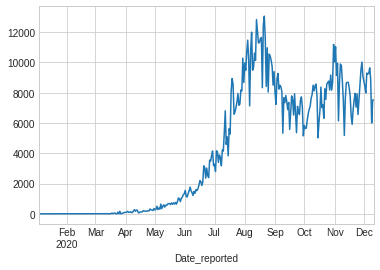

In [13]:
plt.style.use('seaborn-whitegrid')
dfCol.plot(kind = 'line')
plt.show()

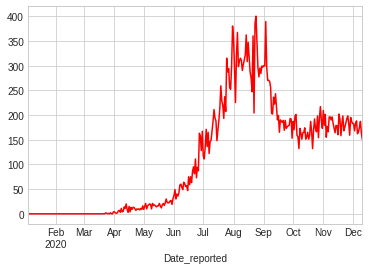

In [14]:
plt.style.use('seaborn-whitegrid')
dfColDeath.plot(kind = 'line', color='red')
plt.show()

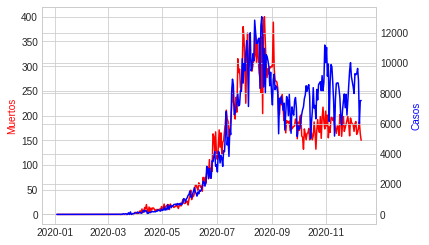

In [15]:
plt.style.use('seaborn-whitegrid')
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.set_ylabel('Muertos', color='red')
ax_left.plot(dfColDeath, color='red')

ax_right.set_ylabel('Casos', color='blue')
ax_right.plot(dfCol, color='blue')


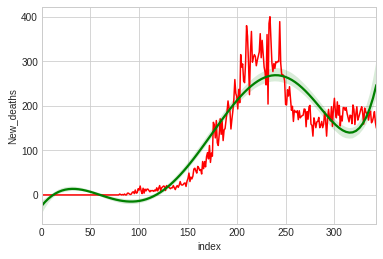

In [16]:
dfColDeath2 = dfColDeath.to_frame().reset_index()
dfColDeath2 = dfColDeath2.drop(columns=['Date_reported'])
dfColDeath2 = dfColDeath2.reset_index()

# Genera un diagrama de linea 
plt.plot(dfColDeath2['index'], dfColDeath2['New_deaths'], label='data', color='red')

# Trazar en verde una regresión lineal de orden X
sns.regplot(x='index', y='New_deaths', data=dfColDeath2, scatter=None, order=6, color='green', label='order 2')

plt.show()

# **Alemania**

In [17]:
dfGer = dfdata[dfdata['Country']== 'Germany']

In [18]:
dfGerDeath = dfGer.groupby('Date_reported')['New_deaths'].sum()
dfGer = dfGer.groupby('Date_reported')['New_cases'].sum()

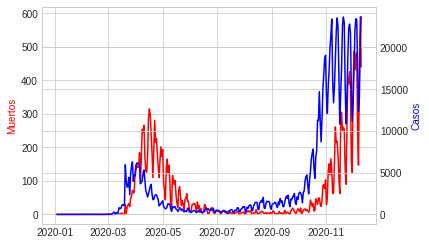

In [19]:
plt.style.use('seaborn-whitegrid')
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.set_ylabel('Muertos', color='red')
ax_left.plot(dfGerDeath, color='red')

ax_right.set_ylabel('Casos', color='blue')
ax_right.plot(dfGer, color='blue')

# **España**

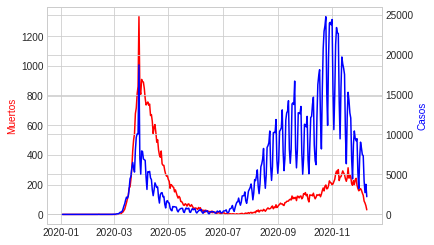

In [20]:
dfEs = dfdata[dfdata['Country']== 'Spain']
dfEsDeath = dfEs.groupby('Date_reported')['New_deaths'].sum()
dfEs = dfEs.groupby('Date_reported')['New_cases'].sum()

plt.style.use('seaborn-whitegrid')
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.set_ylabel('Muertos', color='red')
ax_left.plot(dfEsDeath, color='red')

ax_right.set_ylabel('Casos', color='blue')
ax_right.plot(dfEs, color='blue')

# **Estados Unidos**

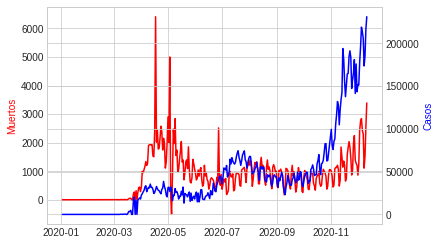

In [21]:
dfUS = dfdata[dfdata['Country_code']== 'US']
dfUSDeath = dfUS.groupby('Date_reported')['New_deaths'].sum()
dfUS = dfUS.groupby('Date_reported')['New_cases'].sum()

plt.style.use('seaborn-whitegrid')
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.set_ylabel('Muertos', color='red')
ax_left.plot(dfUSDeath, color='red')

ax_right.set_ylabel('Casos', color='blue')
ax_right.plot(dfUS, color='blue')

# **Argentina**

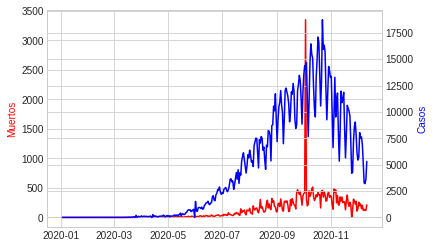

In [22]:
dfAr = dfdata[dfdata['Country']== 'Argentina']
dfArDeath = dfAr.groupby('Date_reported')['New_deaths'].sum()
dfAr = dfAr.groupby('Date_reported')['New_cases'].sum()

plt.style.use('seaborn-whitegrid')
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.set_ylabel('Muertos', color='red')
ax_left.plot(dfArDeath, color='red')

ax_right.set_ylabel('Casos', color='blue')
ax_right.plot(dfAr, color='blue')

# **Italia**

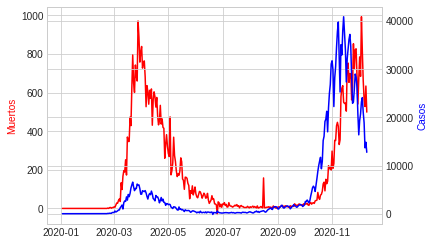

In [23]:
dfIt = dfdata[dfdata['Country']== 'Italy']
dfItDeath = dfIt.groupby('Date_reported')['New_deaths'].sum()
dfIt = dfIt.groupby('Date_reported')['New_cases'].sum()

plt.style.use('seaborn-whitegrid')
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.set_ylabel('Muertos', color='red')
ax_left.plot(dfItDeath, color='red')

ax_right.set_ylabel('Casos', color='blue')
ax_right.plot(dfIt, color='blue')

# **Grafico por paises**

235 Zimbabwe


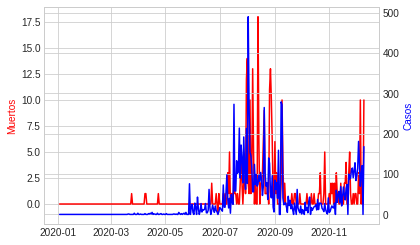

In [24]:
x = 0
for i in Paises:
  clear_output(wait=True)
  x = x + 1
  print(str(x) + ' ' + i)
  dfCount = dfdata[dfdata['Country']== i]
  dfCountDeath = dfCount.groupby('Date_reported')['New_deaths'].sum()
  dfCount = dfCount.groupby('Date_reported')['New_cases'].sum()

  plt.style.use('seaborn-whitegrid')
  fig, ax_left = plt.subplots()
  ax_right = ax_left.twinx()

  ax_left.set_ylabel('Muertos', color='red')
  ax_left.plot(dfCountDeath, color='red')

  ax_right.set_ylabel('Casos', color='blue')
  ax_right.plot(dfCount, color='blue')
  plt.show()
  time.sleep(1)

In [25]:
dfColDeath2['index']

0        0
1        1
2        2
3        3
4        4
      ... 
339    339
340    340
341    341
342    342
343    343
Name: index, Length: 344, dtype: int64